# **DMML Assignment 1**
## Task 1: Customer Churn
submission by: 

Utpalraj Kemprai (MDS202352)

Aryan Joshi

In [1]:
# importing libraries for use
# python version 3.8.5
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report

### Storing data in a dataframe

In [227]:
data = pd.read_csv("customer-churn-data.csv")
data.head() #checking first few values

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [228]:
data.shape

(1000, 15)

### Checking data types of each column

In [229]:
data.dtypes # checking data types

CustomerID                int64
Age                       int64
Gender                   object
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                 bool
PromotionResponse        object
Churn                      bool
dtype: object

### Checking for missing values

In [230]:
data.isna().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
TotalSpend              0
YearsAsCustomer         0
NumOfPurchases          0
AvgTransactionAmount    0
NumOfReturns            0
NumOfSupportQueries     0
SatisfactionScore       0
LastPurchaseDaysAgo     0
EmailOptIn              0
PromotionResponse       0
Churn                   0
dtype: int64

**Summary of data**

In [231]:
data.describe()

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


### Checking for outliers

<AxesSubplot:>

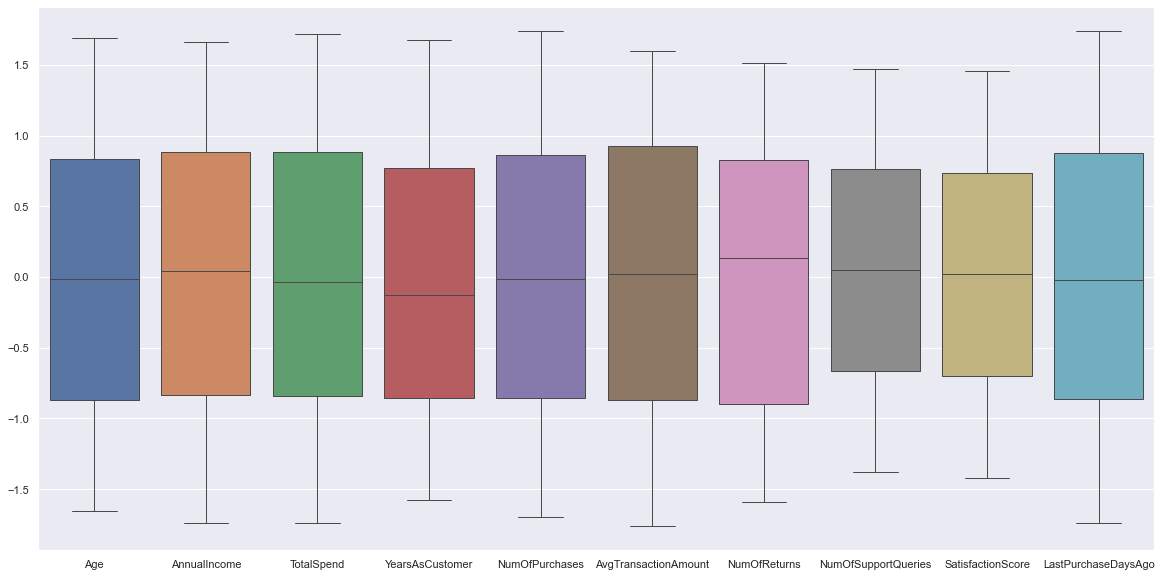

In [232]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
scaler = StandardScaler()
num_col = [col for col in data.select_dtypes(include=['int64','float64']).columns if col != 'CustomerID'] 
scaler.set_output(transform='pandas')
scaler.fit(data[num_col])
# sns.boxplot(pd.DataFrame(box.fit_transform(data.iloc[:,1:].select_dtypes(include = ["int64","float64"]))))
sns.boxplot(scaler.transform(data[num_col]))

In [233]:
scaler.transform(data[num_col]).describe()

,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.945111e-16,8.437695e-17,2.042810e-16,-6.039613e-17,-1.136868e-16,3.730349e-16,-3.907985e-17,2.842171e-17,-1.350031e-16,1.421085e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.658518e+00,-1.740950e+00,-1.737990e+00,-1.577099e+00,-1.698463e+00,-1.758681e+00,-1.592861e+00,-1.379444e+00,-1.418961e+00,-1.743258e+00
25%,-8.708416e-01,-8.361397e-01,-8.396981e-01,-8.542395e-01,-8.572234e-01,-8.723841e-01,-9.021144e-01,-6.661844e-01,-7.001355e-01,-8.615178e-01
50%,-1.752579e-02,4.121801e-02,-3.306810e-02,-1.313798e-01,-1.598356e-02,2.210877e-02,1.340047e-01,4.707513e-02,1.868945e-02,-2.290608e-02
75%,8.357900e-01,8.801889e-01,8.828904e-01,7.721950e-01,8.603079e-01,9.240433e-01,8.247509e-01,7.603346e-01,7.375144e-01,8.732104e-01
max,1.689106e+00,1.661698e+00,1.719461e+00,1.675770e+00,1.736599e+00,1.595972e+00,1.515497e+00,1.473594e+00,1.456339e+00,1.735782e+00


### Correlation Heat Map for numerical data

<AxesSubplot:>

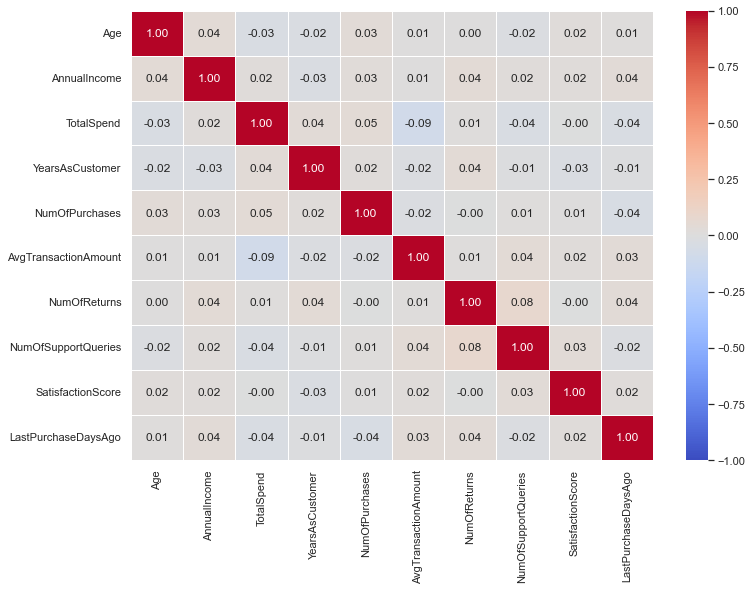

In [234]:
num_data = data.iloc[:,1:].select_dtypes(include = ["int64","float64"]) # customer id dropped as it is independent of churn
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(num_data.corr(),annot=True,cmap="coolwarm",linewidths=0.5,vmin=-1,vmax=1,fmt=".2f")

### **Checking unique values for columns with non-numeric and non-boolean data and encoding them accordingly**

In [235]:
data['Gender'].unique() # checking all categories for gender

array(['Other', 'Male', 'Female'], dtype=object)

In [236]:
data['Gender'].value_counts()

Female    342
Male      334
Other     324
Name: Gender, dtype: int64

In [237]:
data["PromotionResponse"].unique() # checking all categories for Promotion Response

array(['Responded', 'Ignored', 'Unsubscribed'], dtype=object)

In [238]:
data['PromotionResponse'].value_counts()

Unsubscribed    361
Responded       338
Ignored         301
Name: PromotionResponse, dtype: int64

In [239]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
encoded_data = enc.fit_transform(data[['Gender']])
encoded_df = pd.DataFrame(
    encoded_data,columns= enc.get_feature_names_out(['Gender'])
)

In [240]:
encoded_df.head()

,Gender_Female,Gender_Male,Gender_Other
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [241]:
data = data.drop(["Gender"],axis=1)

In [242]:
data.head()

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [243]:
data.loc[data["PromotionResponse"]=="Responded","PromotionResponse"] = 1
data.loc[data["PromotionResponse"]=="Ignored","PromotionResponse"] = 0
data.loc[data["PromotionResponse"]=="Unsubscribed","PromotionResponse"] = -1
data = data.astype({"PromotionResponse":int})

In [244]:
data = pd.concat([data,encoded_df],axis=1)

Viewing the data after encoding

In [245]:
data.head()

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn,Gender_Female,Gender_Male,Gender_Other
0,1,62,45.15,5892.58,5,22,453.80,2,0,3,129,True,1,True,0.0,0.0,1.0
1,2,65,79.51,9025.47,13,77,22.90,2,2,3,227,False,1,False,0.0,1.0,0.0
2,3,18,29.19,618.83,13,71,50.53,5,2,2,283,False,1,True,0.0,1.0,0.0
3,4,21,79.63,9110.30,3,33,411.83,5,3,5,226,True,0,True,0.0,0.0,1.0
4,5,21,77.66,5390.88,15,43,101.19,3,0,5,242,False,-1,False,0.0,0.0,1.0


In [246]:
data.dtypes

CustomerID                int64
Age                       int64
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                 bool
PromotionResponse         int32
Churn                      bool
Gender_Female           float64
Gender_Male             float64
Gender_Other            float64
dtype: object

<AxesSubplot:>

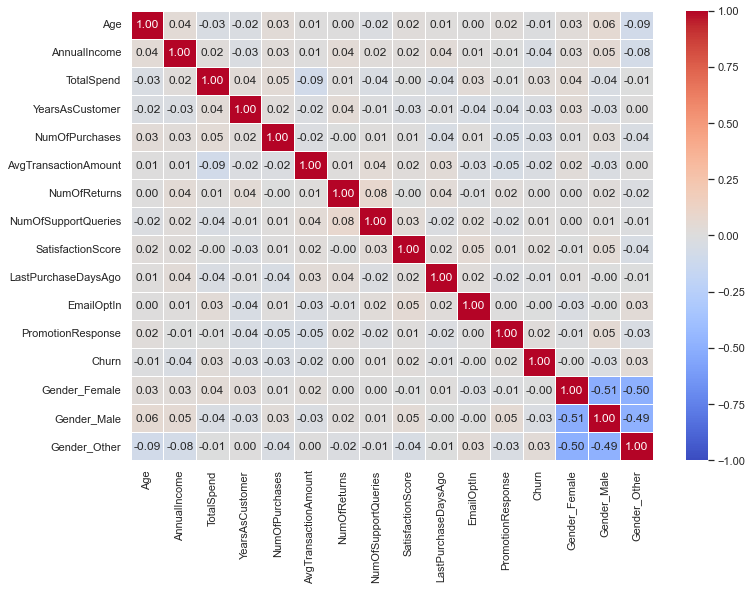

In [247]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.iloc[:,1:].corr(),vmax=1,vmin=-1,annot=True,fmt=".2f",linewidths=0.5,cmap='coolwarm')

In [248]:
data.describe() # describing the data

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,PromotionResponse,Gender_Female,Gender_Male,Gender_Other
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000,-0.023000,0.342000,0.334000,0.324000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319,0.836164,0.474617,0.471876,0.468234
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000,-1.000000,0.000000,0.000000,0.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000,1.000000,1.000000,1.000000,1.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000,1.000000,1.000000,1.000000,1.000000


#### **Percentage of customers who churned in given data**

In [249]:
sum(data["Churn"]==True)*100/len(data["Churn"])

52.6

#### Viewing churn and not churn statistics

In [250]:
data[data['Churn']==True].describe()

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,PromotionResponse,Gender_Female,Gender_Male,Gender_Other
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,512.292776,43.133080,110.141787,5158.620399,9.570342,48.568441,263.454677,4.612167,1.946768,3.003802,181.520913,-0.009506,0.340304,0.321293,0.338403
std,290.451481,15.521333,52.321711,2817.295269,5.516537,28.693554,142.816603,2.827377,1.406454,1.363464,105.831342,0.836037,0.474262,0.467417,0.473617
min,1.000000,18.000000,20.070000,117.200000,1.000000,1.000000,10.700000,0.000000,0.000000,1.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
25%,268.000000,29.000000,68.245000,2833.427500,5.000000,23.000000,139.897500,2.000000,1.000000,2.000000,89.250000,-1.000000,0.000000,0.000000,0.000000
50%,511.500000,43.000000,110.755000,5075.345000,9.000000,47.000000,262.850000,5.000000,2.000000,3.000000,182.000000,0.000000,0.000000,0.000000,0.000000
75%,768.250000,56.000000,157.780000,7604.025000,14.000000,73.000000,393.432500,7.000000,3.000000,4.000000,274.000000,1.000000,1.000000,1.000000,1.000000
max,1000.000000,69.000000,199.080000,9999.490000,19.000000,99.000000,498.820000,9.000000,4.000000,5.000000,364.000000,1.000000,1.000000,1.000000,1.000000


In [251]:
data[data['Churn']==False].describe()

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,PromotionResponse,Gender_Female,Gender_Male,Gender_Other
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,487.413502,43.415612,113.983924,4994.426835,9.900844,50.440928,270.673776,4.611814,1.919831,2.940928,184.409283,-0.037975,0.343882,0.348101,0.308017
std,286.735807,14.941544,53.400385,2911.605244,5.558898,28.374006,149.251718,2.975081,1.399905,1.423412,102.860017,0.836933,0.475504,0.476872,0.462161
min,2.000000,18.000000,20.010000,108.940000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,227.500000,31.000000,66.885000,2474.227500,5.000000,26.000000,139.490000,2.000000,1.000000,2.000000,105.000000,-1.000000,0.000000,0.000000,0.000000
50%,489.500000,44.000000,116.845000,4831.200000,10.000000,50.000000,282.570000,5.000000,2.000000,3.000000,174.000000,0.000000,0.000000,0.000000,0.000000
75%,732.750000,56.000000,160.200000,7604.907500,14.750000,76.750000,406.757500,7.000000,3.000000,4.000000,270.500000,1.000000,1.000000,1.000000,1.000000
max,998.000000,69.000000,199.730000,9999.640000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,362.000000,1.000000,1.000000,1.000000,1.000000


### **splitting into Test and Training Data**

In [252]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:] # features where customer id is excluded as it is independent of Churn
X = X.drop(['Churn'],axis=1)
y = data["Churn"] # label to be predicted
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # splits 20% for test and 80% for training

In [253]:
X.columns

Index(['Age', 'AnnualIncome', 'TotalSpend', 'YearsAsCustomer',
       'NumOfPurchases', 'AvgTransactionAmount', 'NumOfReturns',
       'NumOfSupportQueries', 'SatisfactionScore', 'LastPurchaseDaysAgo',
       'EmailOptIn', 'PromotionResponse', 'Gender_Female', 'Gender_Male',
       'Gender_Other'],
      dtype='object')

### **AdaBoost Classifier using Decision Trees as Base Model**

In [254]:
clf = AdaBoostClassifier() 
from sklearn.tree import DecisionTreeClassifier
parameters = dict()
parameters["estimator"] = [DecisionTreeClassifier(max_depth=2)]
parameters["algorithm"] = ["SAMME"]
parameters["n_estimators"] = [100,125,150,175,200,250,300]
parameters["learning_rate"] = [0.5,1,1.25,1.5,2]


#### Hyperparametric tuning

In [255]:
from sklearn.model_selection import GridSearchCV
adaclf = GridSearchCV(clf,param_grid = parameters,n_jobs=-1,cv=3,verbose=3,return_train_score=True,scoring="accuracy")

#### Fitting the data

In [256]:
adaclf.fit(X_train,y_train) # fitting the model

Fitting 3 folds for each of 35 candidates, totalling 105 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'estimator': [DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.5, 1, 1.25, 1.5, 2],
                         'n_estimators': [100, 125, 150, 175, 200, 250, 300]},
             return_train_score=True, scoring='accuracy', verbose=3)

Best Parameters found and best score on training data

In [257]:
adaclf.best_params_ # best parameters found by hyperparametric tuning

{'algorithm': 'SAMME',
 'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 2,
 'n_estimators': 175}

In [258]:
adaclf.best_score_ # best score during validation

0.5350173185773422

In [259]:
adaclf = adaclf.best_estimator_
adaclf.get_params()

{'algorithm': 'SAMME',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 2,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 2,
 'n_estimators': 175,
 'random_state': None}

In [260]:
adaclf.score(X_train,y_train)

0.61375

Classification report on train data

In [261]:
print(classification_report(y_train,adaclf.predict(X_train),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.649     0.408     0.501       380
       Churn      0.599     0.800     0.685       420

    accuracy                          0.614       800
   macro avg      0.624     0.604     0.593       800
weighted avg      0.622     0.614     0.598       800



Confusion matrix for train data

In [262]:
confusion_matrix(y_train,adaclf.predict(X_train))

array([[155, 225],
       [ 84, 336]], dtype=int64)

### Evaluating performance on test data

Accuracy score

In [263]:
adaclf.score(X_test,y_test)

0.6

Confusion Matrix

In [264]:
confusion_matrix(y_test,adaclf.predict(X_test))

array([[30, 64],
       [16, 90]], dtype=int64)

F1 score, Precision and Recall

In [152]:
lab = ['Accuracy','F Score','Precision','Recall']
score = [adaclf.score(X_test,y_test),f1_score(y_test,adaclf.predict(X_test)),precision_score(y_test,adaclf.predict(X_test)),recall_score(y_test,adaclf.predict(X_test))]
adatest = pd.DataFrame((zip(lab,score)),columns=["Metric","score"])
adatest

,Metric,score
0,Accuracy,0.600000
1,F Score,0.692308
2,Precision,0.584416
3,Recall,0.849057


### **Random Forest Classifier**

In [280]:
rf = RandomForestClassifier()
parameters = dict()
parameters["n_estimators"] = [30,50,75,100,125,150,175,200,250,300,350,400]
parameters["criterion"] = ["gini"]
parameters["max_features"] = ["log2",None]
parameters['max_depth'] = [2,3]
parameters['oob_score'] = [True,False]
parameters['ccp_alpha'] = [0,0.005,0.010]
parameters['random_state'] = [0]
clrf = GridSearchCV(rf,param_grid=parameters,n_jobs=-1,verbose=3,return_train_score=True,cv=3,scoring="accuracy")

Fitting the data

In [281]:
clrf.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.005, 0.01], 'criterion': ['gini'],
                         'max_depth': [2, 3], 'max_features': ['log2', None],
                         'n_estimators': [30, 50, 75, 100, 125, 150, 175, 200,
                                          250, 300, 350, 400],
                         'oob_score': [True, False], 'random_state': [0]},
             return_train_score=True, scoring='accuracy', verbose=3)

Best Parameters found and best score on training data

In [282]:
clrf.best_params_ # best parameters found on training data

{'ccp_alpha': 0,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 30,
 'oob_score': True,
 'random_state': 0}

In [283]:
clrf.best_score_

0.532487586006214

In [284]:
clrf = clrf.best_estimator_
clrf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [285]:
clrf.score(X_train,y_train) # score on training data

0.6

Classification report for training data

In [286]:
print(classification_report(y_train,clrf.predict(X_train),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.750     0.237     0.360       380
       Churn      0.574     0.929     0.709       420

    accuracy                          0.600       800
   macro avg      0.662     0.583     0.535       800
weighted avg      0.657     0.600     0.543       800



Confusion matrix for training data


In [287]:
confusion_matrix(y_train,clrf.predict(X_train))

array([[ 90, 290],
       [ 30, 390]], dtype=int64)

##### Feature importance as per Random Forest

In [288]:
dict(zip(clrf.feature_names_in_,clrf.feature_importances_))

{'Age': 0.08848172851924214,
 'AnnualIncome': 0.16201812722902464,
 'TotalSpend': 0.11186292984297933,
 'YearsAsCustomer': 0.09098727924308311,
 'NumOfPurchases': 0.10533489797260409,
 'AvgTransactionAmount': 0.0899880391717679,
 'NumOfReturns': 0.08244961643168218,
 'NumOfSupportQueries': 0.03176530916968431,
 'SatisfactionScore': 0.06203128230753127,
 'LastPurchaseDaysAgo': 0.13085819674841695,
 'EmailOptIn': 0.0,
 'PromotionResponse': 0.013470672576708682,
 'Gender_Female': 0.0,
 'Gender_Male': 0.030751920787275535,
 'Gender_Other': 0.0}

### Evaluating performance on test data

Accuracy score

In [291]:
clrf.score(X_test,y_test)

0.53

confusion matrix

In [290]:
confusion_matrix(y_test,clrf.predict(X_test))

array([[ 9, 85],
       [ 9, 97]], dtype=int64)

F score, Precision and Recall

In [292]:
lab = ['Accuracy','F Score','Precision','Recall']
score = [clrf.score(X_test,y_test),f1_score(y_test,clrf.predict(X_test)),precision_score(y_test,clrf.predict(X_test)),recall_score(y_test,clrf.predict(X_test))]
rftest = pd.DataFrame((zip(lab,score)),columns=["Metric","score"])
rftest

,Metric,score
0,Accuracy,0.530000
1,F Score,0.673611
2,Precision,0.532967
3,Recall,0.915094


### Comparing the results

Confusion matrix

$\left(\begin{array}{cc} 
TP & FP\\
FN & TN
\end{array}\right)$ where N = The customer churns and P = The Customer does not churn

Adaboost

In [293]:
confusion_matrix(y_test,adaclf.predict(X_test))

array([[30, 64],
       [16, 90]], dtype=int64)

Random Forest

In [294]:
confusion_matrix(y_test,clrf.predict(X_test))

array([[ 9, 85],
       [ 9, 97]], dtype=int64)

##### Scores on the test data

AdaBoost

In [295]:
print("Classification Report for AdaBoost")
print(classification_report(y_test,adaclf.predict(X_test),target_names=("Not Churn","Churn"),digits=3))

Classification Report for AdaBoost
              precision    recall  f1-score   support

   Not Churn      0.652     0.319     0.429        94
       Churn      0.584     0.849     0.692       106

    accuracy                          0.600       200
   macro avg      0.618     0.584     0.560       200
weighted avg      0.616     0.600     0.568       200



Random Forest

In [296]:
print("Classification Report for Random Forest")
print(classification_report(y_test,clrf.predict(X_test),target_names=("Not Churn","Churn"),digits=3))

Classification Report for Random Forest
              precision    recall  f1-score   support

   Not Churn      0.500     0.096     0.161        94
       Churn      0.533     0.915     0.674       106

    accuracy                          0.530       200
   macro avg      0.516     0.505     0.417       200
weighted avg      0.517     0.530     0.433       200

